# Sales Report in 2019  

## 1. Data collection

### 1.1. Import and Unzip

In [108]:
# import modules
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Unzip file
path='Data/Sales2019.zip'
extracted_path='Data/Sales2019/'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
print("Files extracted to:", extracted_path)

Files extracted to: Data/Sales2019/


### 1.2. Merge 12 months data, create and load a new csv

In [110]:
data_frames = []
all_length = []
for file in os.listdir(extracted_path):
    if file.endswith('.csv'):
        filepath = extracted_path + file
        df1 = pd.read_csv(filepath)
        data_frames.append(df1)
        result = pd.concat(data_frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv(extracted_path+'Sales2019.csv', index=False)
df=pd.read_csv(extracted_path+'Sales2019.csv')

## 2. Overview data

In [111]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [113]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


## 3. Data Cleaning and Preprocessing

### 3.1. Data cleaning

In [114]:
## Rename columns 
df = df.rename(columns={'Quantity Ordered': 'Quantity','Price Each':'Price','Order Date':'Date','Purchase Address':'Address'})
df.head()

,Order ID,Product,Quantity,Price,Date,Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [115]:
## Check null
df.isnull().sum()

Order ID    1090
Product     1090
Quantity    1090
Price       1090
Date        1090
Address     1090
dtype: int64

In [116]:
## Drop null
df = df.dropna(how='all')
# Check again
df.isnull().sum()

Order ID    0
Product     0
Quantity    0
Price       0
Date        0
Address     0
dtype: int64

In [117]:
## Check duplicate
df.duplicated().sum()

186923

In [118]:
# View dupicate 
df[df.duplicated()==True]

,Order ID,Product,Quantity,Price,Date,Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [119]:
# Remove dupicate
df = df[df['Order ID'] != 'Order ID']
## Check duplicate again
df.duplicated().sum()

186214

In [120]:
#View duplicate values again for sure
df[df.duplicated()==True]

,Order ID,Product,Quantity,Price,Date,Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
6807,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
8134,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [121]:
## Check for non-numeric values
df['Quantity'].unique()


array(['1', '2', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

### 3.2 Data Preprocessing

In [122]:
# Check type
df.dtypes

Order ID    object
Product     object
Quantity    object
Price       object
Date        object
Address     object
dtype: object

In [123]:
## Change data types to calculate and separate data
df['Quantity'] = df['Quantity'].astype(int) 
df['Price'] = df['Price'].astype(float) 
df['Date'] = pd.to_datetime(df['Date']) 
df.dtypes

Order ID            object
Product             object
Quantity             int32
Price              float64
Date        datetime64[ns]
Address             object
dtype: object

In [124]:
# Calculate
df['Sales'] = df['Quantity'] * df['Price']
# Separate M,D,H
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour 

# Create a city column
df['City'] = df['Address'].apply(lambda address:address.split(',')[1])
df.head()

,Order ID,Product,Quantity,Price,Date,Address,Sales,Month,Day,Hour,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,1,21,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,0,14,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,3,13,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,5,20,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,4,11,Austin


In [125]:
df.columns

Index(['Order ID', 'Product', 'Quantity', 'Price', 'Date', 'Address', 'Sales',
       'Month', 'Day', 'Hour', 'City'],
      dtype='object')

In [126]:
# rearrange columns for better overview
new_cols = ['Order ID','Date','Month', 'Day', 'Hour', 'Address','City','Product', 'Quantity', 'Price', 'Sales']
df=df[new_cols]
df.head()

,Order ID,Date,Month,Day,Hour,Address,City,Product,Quantity,Price,Sales
0,141234,2019-01-22 21:25:00,1,1,21,"944 Walnut St, Boston, MA 02215",Boston,iPhone,1,700.00,700.00
1,141235,2019-01-28 14:15:00,1,0,14,"185 Maple St, Portland, OR 97035",Portland,Lightning Charging Cable,1,14.95,14.95
2,141236,2019-01-17 13:33:00,1,3,13,"538 Adams St, San Francisco, CA 94016",San Francisco,Wired Headphones,2,11.99,23.98
3,141237,2019-01-05 20:33:00,1,5,20,"738 10th St, Los Angeles, CA 90001",Los Angeles,27in FHD Monitor,1,149.99,149.99
4,141238,2019-01-25 11:59:00,1,4,11,"387 10th St, Austin, TX 73301",Austin,Wired Headphones,1,11.99,11.99


## 4. Data Visualisation and Analysis

### 4.1. How much order requests in 2019? => `178437`

In [127]:
df.groupby('Order ID')['Order ID'].count()

Order ID
141234    2
141235    2
141236    2
141237    2
141238    2
         ..
319666    2
319667    2
319668    2
319669    2
319670    2
Name: Order ID, Length: 178437, dtype: int64

### 4.2. What is the total Sales in 2019? => `34492035.97`

In [128]:
df['Sales'].sum().round(2)

68984071.94

### 4.3. Which month has the highest revenue and lowest revenue? => `highest: 12, lowest: 1`

C:\Users\lehoa\AppData\Local\Temp\ipykernel_2316\3059985714.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_months=df.groupby('Month').sum()['Sales']


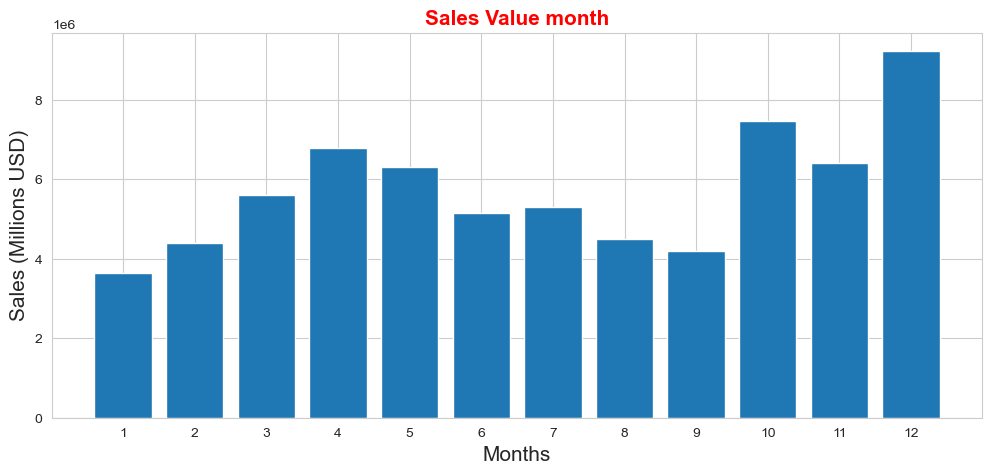

In [129]:
months = range(1,13)
sale_months=df.groupby('Month').sum()['Sales']
plt.figure(figsize=(12,5))
plt.bar(x=months, height=sale_months)
plt.xticks(months)
plt.title("Sales Value month",fontsize=15, fontweight="bold", color='r')
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales (Millions USD)',fontsize=15)
plt.show()

### 4.4. When do we have the most orders in the day? => `12 p.m and 19 p.m` 

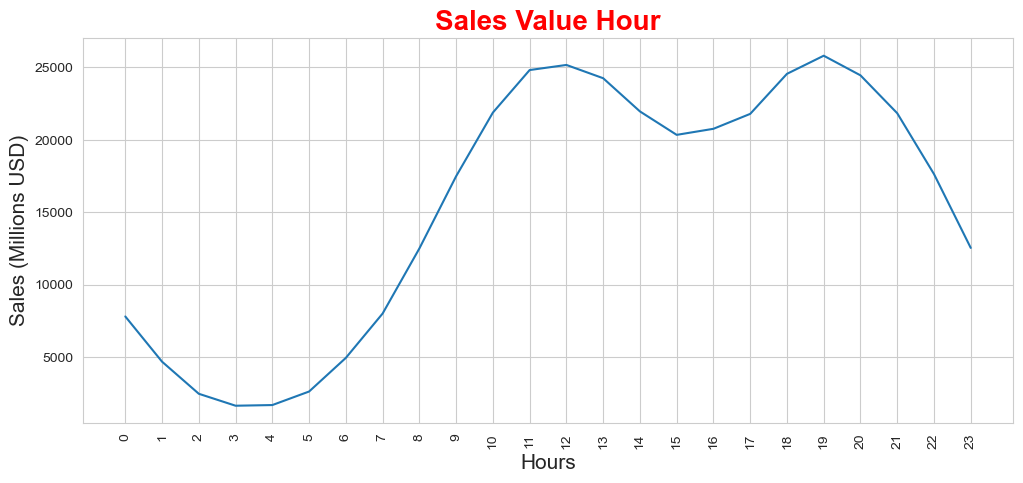

In [130]:
sales_hours = df.groupby('Hour').count()['Sales']
hours = list(sales_hours.index)
plt.figure(figsize=(12,5))
plt.plot(hours, sales_hours)
plt.xticks(hours, rotation=90)
plt.title("Sales Value Hour",fontsize=20, fontweight="bold", color='r')
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Sales (Millions USD)',fontsize=15)
plt.grid(True)
plt.show()

### 4.5. Which city bought the most? => `San Francisco`

Text(0, 0.5, 'City')

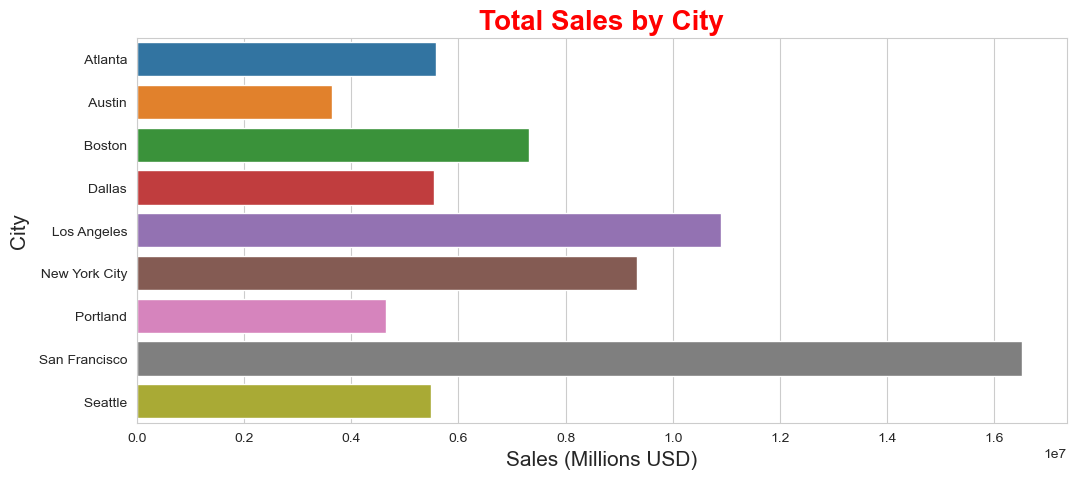

In [131]:
city_rev = df.groupby('City')['Sales'].sum()
city_rev = city_rev.reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(
    x='Sales',
    y='City',
    data=city_rev)
plt.title('Total Sales by City', fontsize=20, fontweight="bold", color='r')
plt.xlabel('Sales (Millions USD)', fontsize=15)
plt.ylabel('City', fontsize=15)

### 4.6. What items are purchased together most? => `iPhone, Lightning Charging Cable: 882`

In [132]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(lambda product: ', '.join(product))
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head()

Lightning Charging Cable, Lightning Charging Cable    19831
AAA Batteries (4-pack), AAA Batteries (4-pack)        19826
AA Batteries (4-pack), AA Batteries (4-pack)          19809
USB-C Charging Cable, USB-C Charging Cable            19792
Wired Headphones, Wired Headphones                    17208
Name: All Products, dtype: int64

### 4.7. What was the relationship between quantity and price products in 2019?
=> `Low-value products sell more than high value products`

In [146]:
# Create new df
quantity_products = df.groupby('Product').sum()['Quantity']
price_products = df.groupby('Product').mean()['Price']
products_ls = [product for product, quant in quantity_products.items()]
new_df = pd.DataFrame({'Product': quantity_products.index, 'Quantity': quantity_products.values, 'Price': price_products.values})
new_df.head()

,Product,Quantity,Price
0,20in Monitor,8258,109.99
1,27in 4K Gaming Monitor,12488,389.99
2,27in FHD Monitor,15100,149.99
3,34in Ultrawide Monitor,12398,379.99
4,AA Batteries (4-pack),55270,3.84


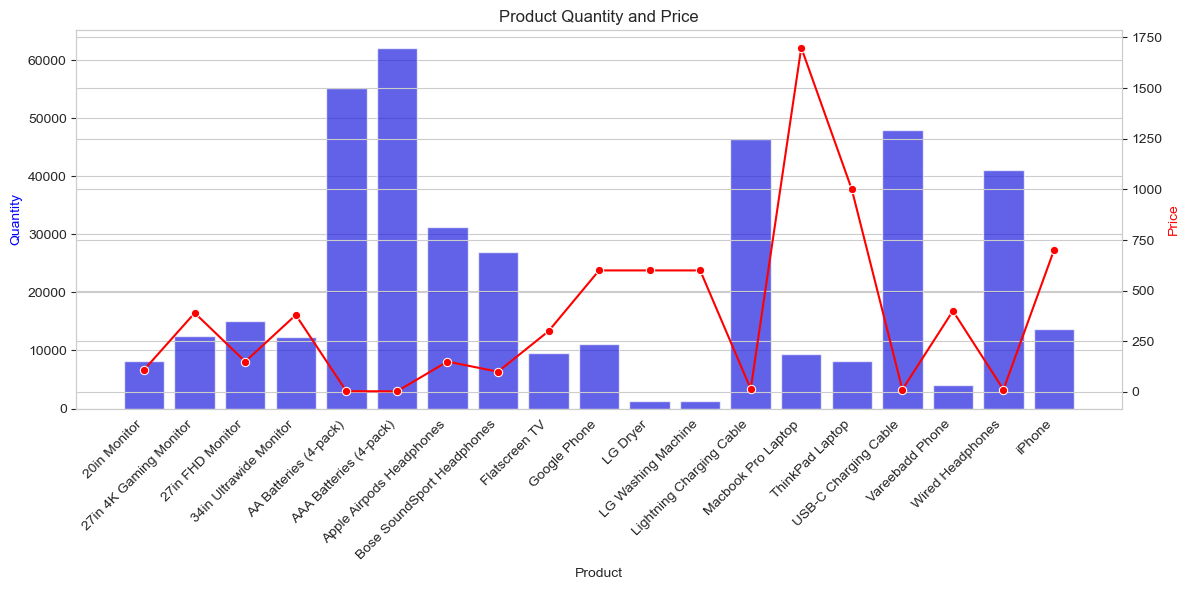

In [147]:
# Create the overlay plot
plt.figure(figsize=(12, 6))  # Adjust the figure size

sns.set_style("whitegrid")

# Bar plot for quantity
ax = sns.barplot(x='Product', y='Quantity', data=new_df, color='blue', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Line plot for price
ax2 = ax.twinx()
sns.lineplot(x='Product', y='Price', data=new_df, ax=ax2, color='red', marker='o')

# Adding labels and title
ax.set_ylabel('Quantity', color='blue')
ax2.set_ylabel('Price', color='red')
ax.set_xlabel('Product')
plt.title('Product Quantity and Price')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()